In [551]:
import pandas as pd
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
!pip install dabl
import numpy as np


     |████████████████████████████████| 558 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.4 MB/s eta 0:00:01     |██████████████████████████▊     | 6.0 MB 2.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [342]:
# read in data from csv

Student_exams_df = pd.read_csv("/Users/debo/Desktop/StudentsPerformance.csv")

Student_exams_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [634]:
#adding additional column to dataframe to hold the total scores 
lunch_df = Student_exams_df[["lunch","gender", "math score", "reading score", "writing score"]]
lunch_df['average'] =lunch_df.mean(axis=1)
lunch_df

,lunch,gender,math score,reading score,writing score,average
0,standard,female,72,72,74,72.666667
1,standard,female,69,90,88,82.333333
2,standard,female,90,95,93,92.666667
3,free/reduced,male,47,57,44,49.333333
4,standard,male,76,78,75,76.333333
...,...,...,...,...,...,...
995,standard,female,88,99,95,94.000000
996,free/reduced,male,62,55,55,57.333333
997,free/reduced,female,59,71,65,65.000000
998,standard,female,68,78,77,74.333333


In [635]:
# Using GroupBy in order to separate the data into fields according to "lunch" values
grouped_lunch_df = lunch_df.groupby(['lunch','gender'])

# In order to be visualized, a data function must be used...
grouped_lunch_df.head()



,lunch,gender,math score,reading score,writing score,average
0,standard,female,72,72,74,72.666667
1,standard,female,69,90,88,82.333333
2,standard,female,90,95,93,92.666667
3,free/reduced,male,47,57,44,49.333333
4,standard,male,76,78,75,76.333333
5,standard,female,71,83,78,77.333333
6,standard,female,88,95,92,91.666667
7,free/reduced,male,40,43,39,40.666667
8,free/reduced,male,64,64,67,65.000000
9,free/reduced,female,38,60,50,49.333333


(-75.0, 100.0)

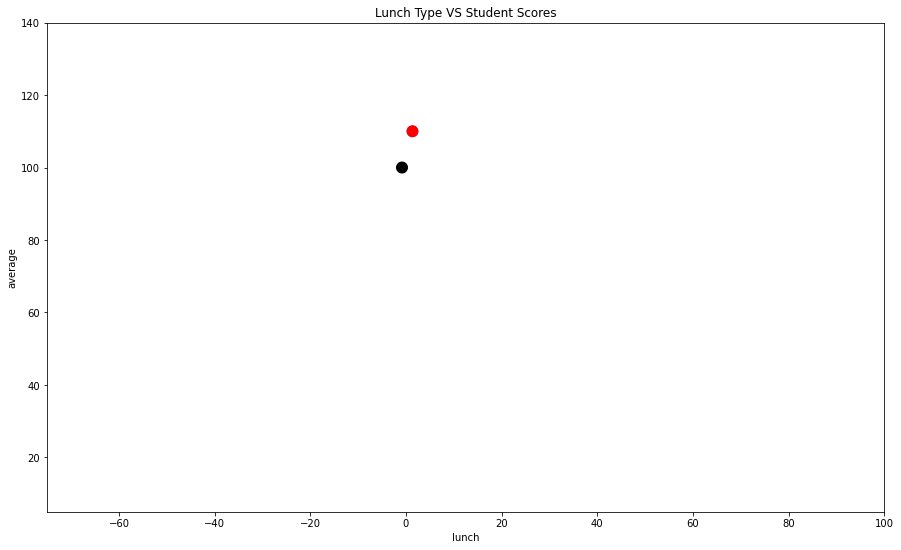

In [640]:
grouped_lunch_df = pd.DataFrame(np.random.randn(10, 2), columns=['lunch', 'average'])
grouped_lunch_df['average'] = np.arange(len(grouped_lunch_df))**3 * 10 + 100
grouped_lunch_df.plot.scatter('lunch','average',grouped_lunch_df['average'])

colors = np.where(grouped_lunch_df.average > 100 , 'r', 'k')
scatter = plt.scatter(grouped_lunch_df.lunch, grouped_lunch_df.average, s =120, c=colors)

#Plotting title and X and Y limits
plt.title("Lunch Type VS Student Scores")
plt.ylim(5,140)
plt.xlim(-75,100)

In [348]:
       
#     fig.trace(
# go.Scatter(
# x = [2,4],
# y = [4,8],
# mode = "lines",
# line = go.scatter.Line(color = "green"),
# showlegend = False)

# fig.show()


In [550]:
lunch_score_fig = px.scatter(lunch_df,x='average',y='lunch',color='lunch',
    title = "Comparing Lunch Type to Average Student Scores",
    hover_name='average',
    range_x=[0, 140]
)

lunch_score_fig.show() 

In [511]:
pio.templates.default = "simple_white"

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 800
px.defaults.height = 400


fig = go.Figure(data = go.Scatter(x = lunch_df['average'], y = lunch_df['lunch'], mode ='markers', marker_color 
                                      =lunch_df['average'], text = lunch_df['average'])) #hover text
fig.update_layout(title='Comparing Lunch Type to Average Student Scores').update_layout(title_font_size=24)
fig.update_xaxes(showgrid=False).update_traces(marker=dict(size=20,line=dict(width=2,color ='DarkSlateGrey')),
                                               selector=dict(type="scatter", mode="markers"))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.01))
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),paper_bgcolor="LightSteelBlue",)


fig.show()


In [654]:
fig = go.Figure()
fig.add_trace(go.Bar(x = lunch_df['lunch'], y = lunch_df['average'], text = lunch_df['lunch'],marker_color = "red"))
fig.update_traces(overwrite=True, marker={"opacity" :0.7})
fig.update_layout(title_text="Does Lunch Type Affect Average Student Scores?",title_font_size=30)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.01))

fig.show()

In [653]:
#animated scatter plot
px.scatter(lunch_df,                  #dataframe
          x = "average",              #x-values column
          y = "lunch",               #y-values column
          animation_frame = "lunch",    #column animated
          animation_group = "average", #column shown as bubble
          size = "average",                #column shown by size
          color = "average",         #column shown by color
          hover_name = "lunch",      #hover info title
          log_x = True,                #use logs on x-values
          size_max = 15,               #change max size of bubbles
          range_x = [6,115],      #axis range for x-values
          range_y = [-75,110],            #axis range for y-values
          title = "Does Lunch Type Affect Average Student Scores?"
          
          )
showlegend=False
fig.show()         

In [482]:
new = px.data.lunch_df

fig = px.bar(new, x ="lunch", y="average",color = "average", animation_frame = "lunch",
             animation_group="average", range_y =[0,110])
fig.show()

AttributeError: module 'plotly.express' has no attribute 'lunch_df'

In [648]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(go.Bar(x=lunch_df['lunch'], y=lunch_df['average'],
                    marker=dict(color=lunch_df['average'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=lunch_df['lunch'], y=lunch_df['gender'],
                    marker=dict(color=['green'], coloraxis="coloraxis")),
              1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

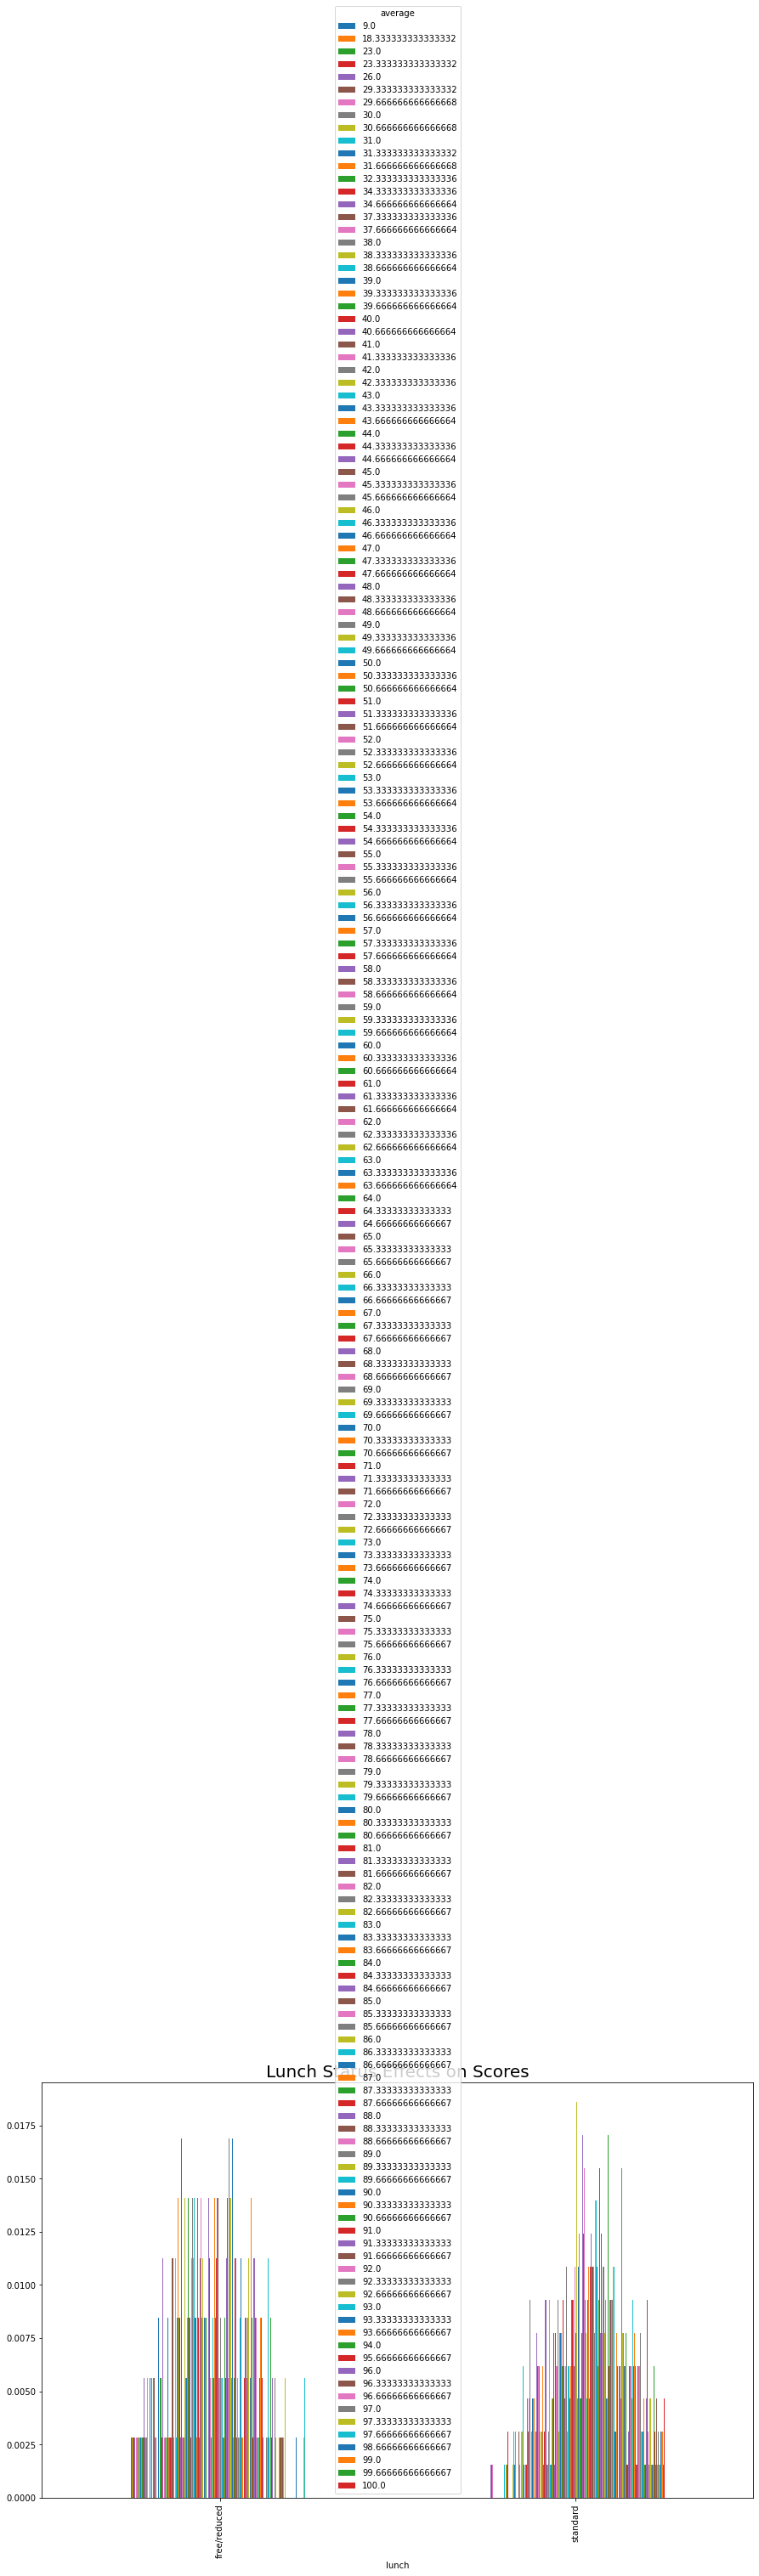

In [632]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(lunch_df['lunch'], lunch_df['average'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Lunch Status Effects on Scores', fontweight = 30, fontsize = 20)
plt.show()

In [633]:
fig = px.bar(lunch_df, x = "lunch", y = "average", color = "lunch",
            animation_frame = "average",
            animation_group ="lunch",
            range_y=[2,110])
fig.update_layout(height = 600, title_text = "Lunch Types Affects On Student Performance")
fig.show()